<a href="https://colab.research.google.com/github/shivani-202/Biomedical-Document-Classification/blob/main/dataset01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/cancerdocs.csv', encoding='latin-1')
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.5+ KB


(None,
         Unnamed: 0
 count  7570.000000
 mean   3784.500000
 std    2185.415102
 min       0.000000
 25%    1892.250000
 50%    3784.500000
 75%    5676.750000
 max    7569.000000)



*   data has no null values
*   it's shape is (7570, 3)



In [ ]:
#check duplicate values, null and missing values
df.fillna(df.mean(), inplace=True)
df.fillna('', inplace=True)

In [3]:
df.isna().sum()

,0
Unnamed: 0,0
0,0
a,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.rename(columns={'0': 'labels', 'a': 'text'})
df.head()

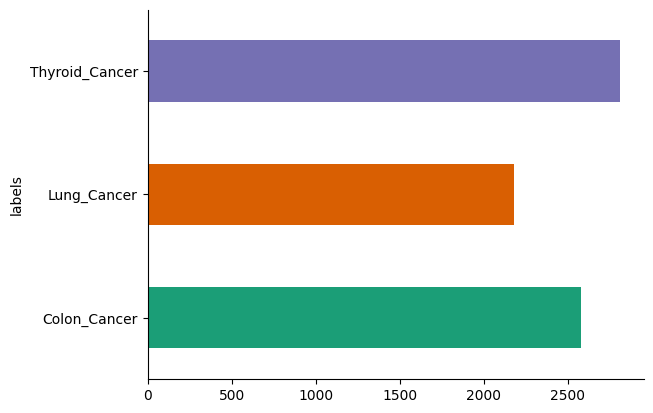

In [ ]:
#labels
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['labels'].value_counts()

,count
labels,
Thyroid_Cancer,2810
Colon_Cancer,2580
Lung_Cancer,2180




*   The classification problem involves three distinct classes


1.   Thyroid Cancer
2. Colon Cancer
3. Lung Canger







Check for outliers

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


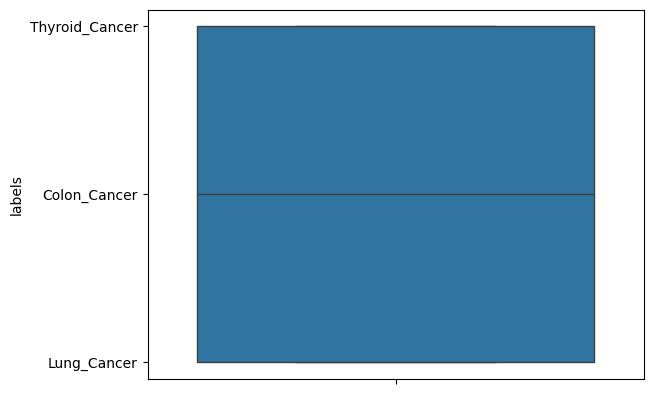

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(df['labels'])
    plt.show()



*   No outliers
*   The plot suggests a balanced distribution without major deviations as all three cancer categories seem to have similar ranges and medians.



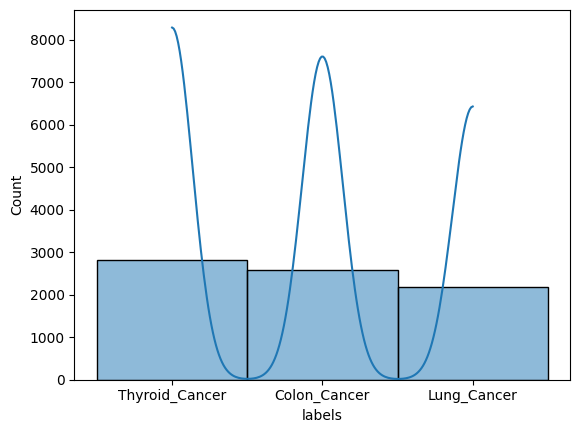

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.histplot(df['labels'], kde=True)
    plt.show()


In [ ]:
#descriptive statistics
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
print(df[['text', 'word_count']].head())
print(df['word_count'].describe())

                                                text  word_count
0  Thyroid surgery in  children in a single insti...        2871
1  " The adopted strategy was the same as that us...        2494
2  coronary arterybypass grafting thrombosis ï¬b...        2954
3   Solitary plasmacytoma SP of the skull is an u...        1880
4   This study aimed to investigate serum matrix ...        3037
count    7570.000000
mean     3484.939102
std      1349.791031
min        80.000000
25%      2496.000000
50%      4191.000000
75%      4478.000000
max      5259.000000
Name: word_count, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


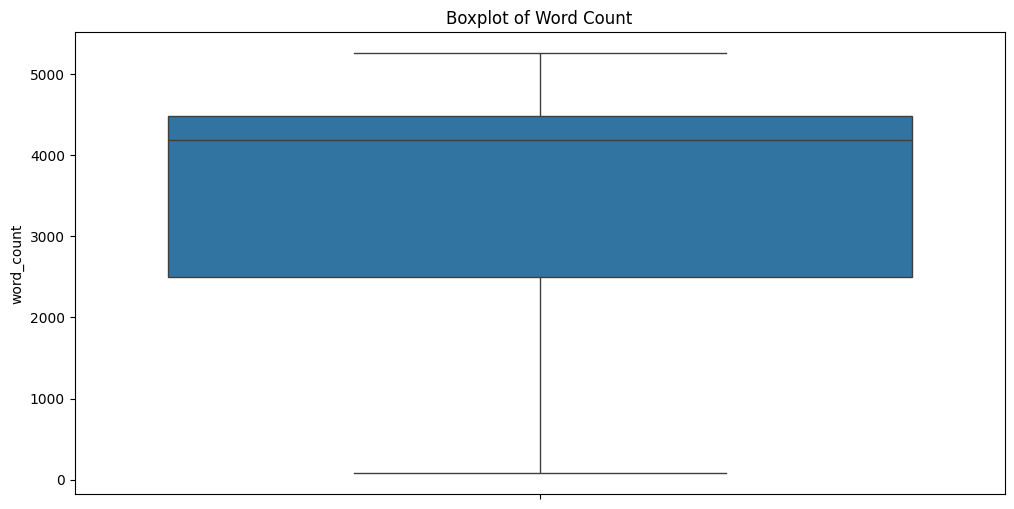

Outliers:
0


In [ ]:
# outlier detection and boxplot
plt.figure(figsize=(12,6))
sns.boxplot(df['word_count'])
plt.title('Boxplot of Word Count')
plt.show()

#identify outliers (documents with unusually high/low word count)

Q1 = df['word_count'].quantile(0.25)
Q3 = df['word_count'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['word_count'] < Q1 - 1.5 * IQR) | (df['word_count'] > Q3 + 1.5 * IQR)]
print("Outliers:")
print(len(outliers))

The word count data is spread around 3,000 to 4,500 words for most documents, with some variation up to 5,000 and no extreme outliers.

In [ ]:
#removing outliers(optional)
df_cleaned = df[(df['word_count'] >= Q1 - 1.5 * IQR) & (df['word_count'] <= Q3 + 1.5 * IQR)]
print("Cleaned DataFrame:")
print(df_cleaned.head())

Cleaned DataFrame:
   Unnamed: 0          labels  \
0           0  Thyroid_Cancer   
1           1  Thyroid_Cancer   
2           2  Thyroid_Cancer   
3           3  Thyroid_Cancer   
4           4  Thyroid_Cancer   

                                                text  word_count  
0  Thyroid surgery in  children in a single insti...        2871  
1  " The adopted strategy was the same as that us...        2494  
2  coronary arterybypass grafting thrombosis ï¬b...        2954  
3   Solitary plasmacytoma SP of the skull is an u...        1880  
4   This study aimed to investigate serum matrix ...        3037  


In [ ]:
#check for null values again after cleaning
print(df_cleaned.isnull().sum())
df_cleaned.dropna(inplace=True)

Unnamed: 0    0
labels        0
text          0
word_count    0
dtype: int64


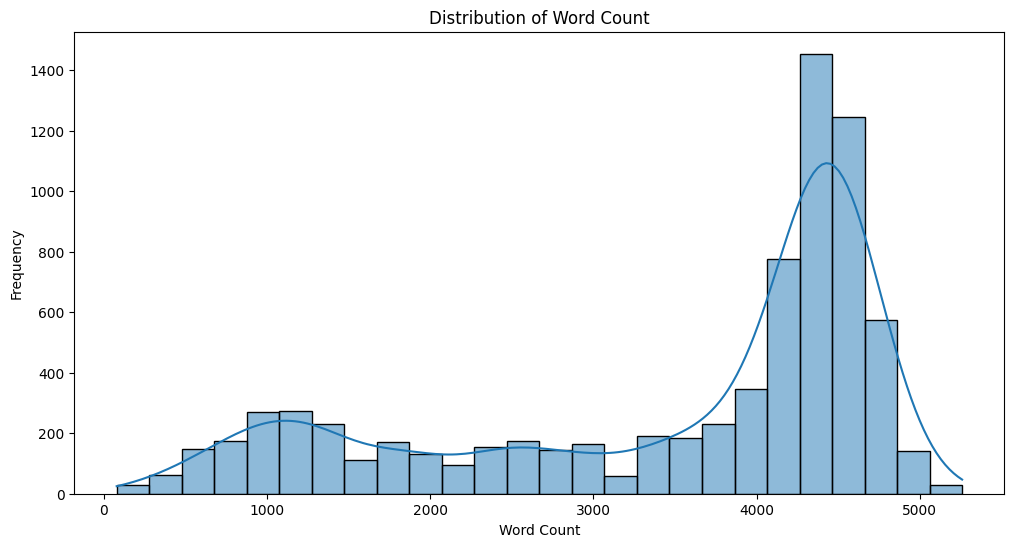

In [ ]:
#distribution pattern
plt.figure(figsize=(12,6))
sns.histplot(df_cleaned['word_count'], kde=True)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#sample mean of word count
sample_mean = df_cleaned['word_count'].mean()
print(f'Sample Mean:  {sample_mean}')

#sample standard deviation
sample_std = df_cleaned['word_count'].std()
print(f'Sample Standard Deviation:  {sample_std}')

#percentiles

p_25 = df_cleaned['word_count'].quantile(0.25)
p_75 = df_cleaned['word_count'].quantile(0.75)
print(f'25th Percentile: {p_25}')
print(f'75th Percentile: {p_75}')

#median and thrid quartile
median = df_cleaned['word_count'].median()
third_quartile = df_cleaned['word_count'].quantile(0.75)
print(f'Median: {median}')
print(f'Third Quartile:  {third_quartile}')


Sample Mean:  3484.939101717305
Sample Standard Deviation:  1349.791030979305
25th Percentile: 2496.0
75th Percentile: 4478.0
Median: 4191.0
Third Quartile:  4478.0


In [ ]:
#trimmed mean
from scipy.stats import trim_mean
data_cleaned = df_cleaned.copy()
trim_fraction = 0.1  # 10% of the data will be trimmed from both ends
trimmed_mean = trim_mean(data_cleaned['word_count'], proportiontocut=trim_fraction)
print(f'Trimmed Mean: {trimmed_mean}')

#trimmed median
trimmed_median = data_cleaned['word_count'].median()
print(f'Trimmed Median: {trimmed_median}')

#trimmed standard deviation
trimmed_std = data_cleaned['word_count'].std()
print(f'Trimmed Standard Deviation: {trimmed_std}')


Trimmed Mean: 3659.473249669749
Trimmed Median: 4191.0
Trimmed Standard Deviation: 1349.791030979305


In [ ]:
#augmentation
import random

def synonym_replacement(text):
    words = text.split()
    new_words = [word if random.random() > 0.1 else 'synonym' for word in words]  # Replace 10% of words with 'synonym'
    return ' '.join(new_words)

df_cleaned['augmented_text'] = df_cleaned['text'].apply(synonym_replacement)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


vectorizer = TfidfVectorizer(max_features=100)  # Convert text to 100 TF-IDF features
tfidf_matrix = vectorizer.fit_transform(df['text'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df.head())

   activity     after       all      also        an  analysis       and  \
0  0.000000  0.064353  0.032752  0.005491  0.025495  0.005651  0.417140   
1  0.000000  0.016554  0.020595  0.005179  0.033666  0.010659  0.327878   
2  0.016415  0.041894  0.000000  0.005618  0.031298  0.017342  0.426741   
3  0.000000  0.033211  0.018592  0.000000  0.063680  0.000000  0.422860   
4  0.000000  0.149419  0.008713  0.017531  0.020348  0.045099  0.503367   

        are        as  associated  ...     tumor       two       use  \
0  0.061349  0.015086    0.018535  ...  0.014868  0.011939  0.006216   
1  0.043399  0.094862    0.005827  ...  0.007012  0.039412  0.017589   
2  0.062761  0.082310    0.050564  ...  0.000000  0.006107  0.019078   
3  0.029022  0.022837    0.000000  ...  0.000000  0.006777  0.007058   
4  0.016322  0.052176    0.009862  ...  0.071199  0.009529  0.004961   

       used     using       was        we      were     which      with  
0  0.005654  0.011499  0.127388  0.011234 

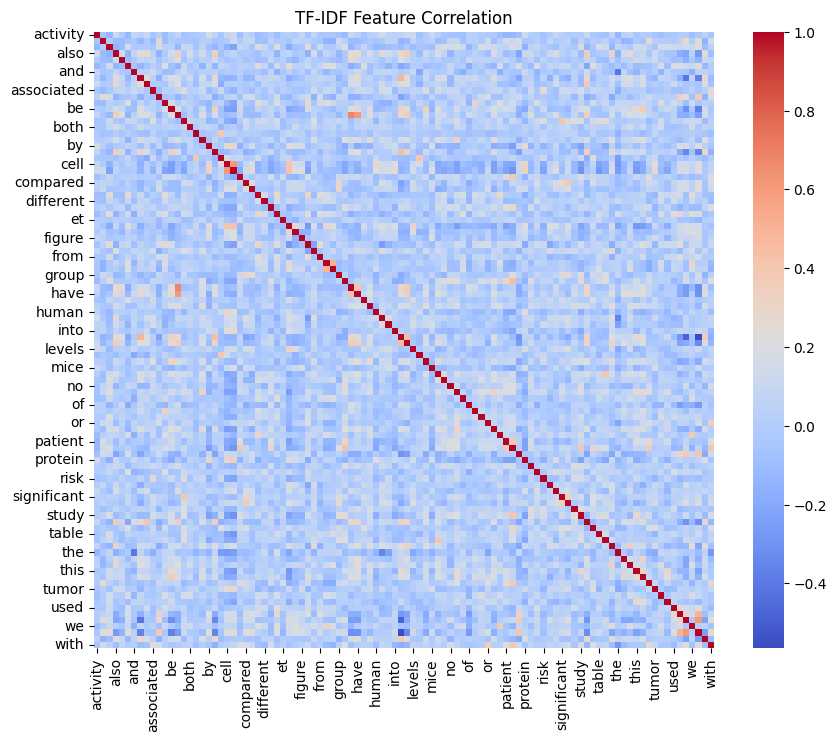

In [ ]:
# Calculate the correlation matrix for TF-IDF features
correlation_matrix = tfidf_df.corr()

# Plot a heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('TF-IDF Feature Correlation')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, log_loss, matthews_corrcoef, cohen_kappa_score
)


# Vectorize the text data
tfidf = TfidfVectorizer(max_features=5000)  # Limit features to speed up computation
X_tfidf = tfidf.fit_transform(X)

# Function to run experiments with different algorithms and evaluation metrics
def run_experiment(model, model_name):
    results = {}

    for split in [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]:
        X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=split[1], random_state=42)

        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Check if model supports predict_proba
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
        else:
            y_prob = None  # No probability predictions available

        # Collect all evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Use ROC-AUC and Log-Loss only if probability predictions are available
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else 'N/A'
        loss = log_loss(y_test, y_prob) if y_prob is not None else 'N/A'

        cm = confusion_matrix(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)

        results[split] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC-ROC': auc,
            'Confusion Matrix': cm,
            'Log-Loss': loss,
            'MCC': mcc,
            'Cohen\'s Kappa': kappa
            'Adjusted R^2': adjusted_r2,
            'Adjusted RMSE': adjusted_rmse
        }

    return results

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial NB': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
    'SVM': SVC(kernel='linear', probability=True),  # Ensure probability=True for SVM
}

# Running experiments for all models
for name, model in models.items():
    print(f"Running experiments for {name}...")
    results = run_experiment(model, name)

    # Display the results
    for split, metrics in results.items():
        print(f"\nTrain-Test Split: {split[0]*100}-{split[1]*100}")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")


Running experiments for Logistic Regression...

Train-Test Split: 50.0-50.0
Accuracy: 0.9178335535006605
Precision: 0.924009912568735
Recall: 0.923876734177977
F1-Score: 0.9239368773643742
AUC-ROC: 0.9881717499061732
Confusion Matrix: [[1156    0  160]
 [   0 1055    0]
 [ 151    0 1263]]
Log-Loss: 0.32021533035779165
MCC: 0.8758510896109489
Cohen's Kappa: 0.8758436023966081

Train-Test Split: 60.0-40.0
Accuracy: 0.928335535006605
Precision: 0.9339668656873373
Recall: 0.9335159358378355
F1-Score: 0.9336957872538133
AUC-ROC: 0.9910893886297593
Confusion Matrix: [[ 932    0  118]
 [   0  841    0]
 [  99    0 1038]]
Log-Loss: 0.2949563343724348
MCC: 0.8917066495310985
Cohen's Kappa: 0.8916535206636699

Train-Test Split: 70.0-30.0
Accuracy: 0.9326287978863936
Precision: 0.9387968064153619
Recall: 0.9380556027405017
F1-Score: 0.9382126048396938
AUC-ROC: 0.992111235330615
Confusion Matrix: [[720   0  92]
 [  0 618   0]
 [ 61   0 780]]
Log-Loss: 0.27554572404725286
MCC: 0.8982981246079099
Co